# CV Hw2 -- Problem1 RANSAC

The following program is to fit a straight 2D line using RANSAC from given sample points.

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
random.seed(10)

In [74]:
# this function is to realize the RANSAC models
def ransac(max_iterations, point_set):
#   initial the parameters of the best fitting line
    best_k = 0
    best_b = 0
    best_inliers_number = 0
#   set the threshold for inliers
    inlier_threshold = 1
#   the total number of points
    point_set.shape[1]
    
    for i in range(max_iterations):
#       randomly select two points as a sample
        sample_index = random.sample(range(0, 14), 2)
        sample_point = point_set[:, sample_index]
#       x, y coordinates of the sample points
        x = sample_point[0, :]
        y = sample_point[1, :]
        
#       line slope 
        k = (y[1] - y[0]) / (x[1] - x[0])
#       y axis intercept
        b = y[0] - k * x[0]
    
#       this is used for calculate the distance from each point to the fitting line
        dist_parameters = [k, -1, b]
        
        one = np.ones((1, 14)).astype(np.float64)
#       calculate the distance from each point to the fitting line
        dist = abs(np.dot(dist_parameters, np.vstack([point_set, one])))
        
#       calculate the number of inliers
        compare = dist < inlier_threshold 
        compare = np.where(compare==True, 1, 0)
        inliers_number = np.sum((compare))
        
#       find the fitting line with the most inliers
        if inliers_number > best_inliers_number:
            best_inliers_number = inliers_number
            best_parameters = dist_parameters
    
#   statistic the positions of inlier points
    inliers = np.zeros( (1,14) )
    inliers = np.array(inliers)
    compare = abs(np.dot(best_parameters, np.vstack([point_set, one]))) < inlier_threshold 
    is_inlier = np.where(compare==True, 1, 0)
      
#   show the inliers points with *
    count = 0
    for i in range(0, 14):
        if is_inlier[i] == 1:
            inliers[0, count] = point_set[0, i]
            plt.plot(point_set[0, i], point_set[1, i], 'r*')
            count = count + 1
            
#   return the besk parameters and X, Y coordinates
    best_k = best_parameters[0]
    best_b = best_parameters[2]
    
    X = range(int(min(inliers[0, :])), int(max(inliers[0, :]))+1)
    Y = best_k * X + best_b
    
    return X, Y, best_k, best_b

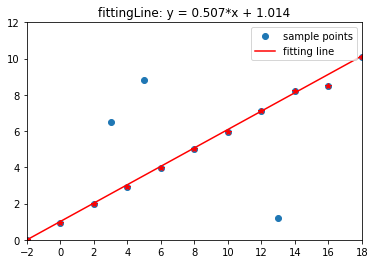

In [75]:
# set the maximum interation times
max_iterations = 1000

# set the data points
point_set = [[-2, 0, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 16, 18], 
             [0, 0.9, 2.0, 6.5, 2.9, 8.8, 3.95, 5.03, 5.97, 7.1, 1.2, 8.2, 8.5, 10.1]]

# plot the points sets
point_set = np.array(point_set)
plt.figure()
plt.plot(point_set[0,:], point_set[1,:], 'o', label = 'sample points')

# call ransac to find the best fitting line
X, Y, best_k, best_b = ransac(max_iterations, point_set)

# plot the best fitting line
plt.plot(X, Y, 'r', label = 'fitting line')
title = 'fittingLine: y = %1.3f*x + %1.3f'%(best_k, best_b)
plt.title(title)
plt.legend(loc='upper right')
my_x_ticks = np.arange(-2, 20, 2)  
my_y_ticks = np.arange(0, 14, 2)  
plt.xticks(my_x_ticks)  
plt.yticks(my_y_ticks)
plt.xlim((-2, 18))
plt.ylim((0, 12))
plt.savefig('LineFitting.png')
plt.show()